In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\srish\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### not treating the outliers

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Class Distributions \n (0: No Diabetes || 1: Diabetes)')

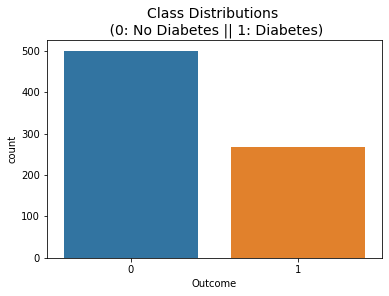

In [7]:
sns.countplot('Outcome', data=df)
plt.title('Class Distributions \n (0: No Diabetes || 1: Diabetes)', fontsize=14)

In [8]:
# The classes are heavily skewed we need to solve this issue later.
print('No Diabetes', round(df['Outcome'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Diabetes', round(df['Outcome'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Diabetes 65.1 % of the dataset
Diabetes 34.9 % of the dataset


In [9]:
X = df.drop(["Outcome"],axis=1)
y = df.Outcome

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1)

### Creating a model

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\srish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting 

In [14]:
pred = lr.predict(x_test)

###### Train Score

In [15]:
lr.score(x_train,y_train)

0.7833876221498371

###### Test score

In [16]:
lr.score(x_test,y_test)

0.7792207792207793

In [17]:
from sklearn.metrics import confusion_matrix, roc_curve,accuracy_score

###### Accuracy

In [18]:
print(accuracy_score(y_test,pred))

0.7792207792207793


###### Confusion Matrix

In [19]:
confusion_matrix(y_test,pred)

array([[89, 10],
       [24, 31]], dtype=int64)

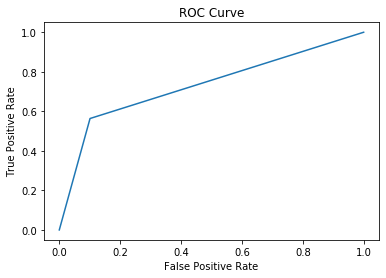

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
# Plot ROC curve
#plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

###### Roc_auc_Score

In [22]:
print(roc_auc_score(y_test,pred))

0.7313131313131312


In [23]:
print((cross_val_score(lr, X, y, scoring='roc_auc', cv=5)).mean())

C:\Users\srish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\srish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.8299902166317261


C:\Users\srish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
from sklearn.metrics import f1_score,log_loss

###### F1 Score

In [25]:
print(f1_score(y_test,pred))

0.6458333333333333


###### Log Loss

In [26]:
print(log_loss(y_test,pred))

7.625496061047177


###### Classification report

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



### To improve Accuracy

In [28]:
import statsmodels.api as sm

In [29]:
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                            GLM   Df Residuals:                      605
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -288.92
Date:                Tue, 09 Jun 2020   Deviance:                       577.84
Time:                        10:27:49   Pearson chi2:                     600.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.1328      0.791    -10.285      0.000      -9.683      -6.583
Pregnancies                  0.1277      0.035      3.606      0.000       0.058       0.197
Glucose                      0.0364      0.004      8.791      0.000       0.028       0.045
BloodPressure               -0.0148      0.006     -2.608      0.009      -0.026      -0.004
SkinThickness               -0.0022      0.008     -0.282      0.778      -0.017       0.013
Insulin                     -0.0009      0.001     -0.877      0.380      -0.003       0.001
BMI                          0.0869      0.017      5.130      0.000       0.054       0.120
DiabetesPedigreeFunction     0.7092      0.330      2.152      0.031       0.063       1.355
Age                          0.0112      0.010      1.079      0.281      -0.009       0.032
============================================================================================
"""

In [30]:
# feature selection with RFE

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 2)            
rfe = rfe.fit(X,y)
print(rfe.support_)           
print(rfe.ranking_)           

C:\Users\srish\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[ True False False False False False  True False]
[1 3 5 6 7 2 1 4]


#### Removing the low value feature from the data to improve the accuracy

In [56]:
X_a = df.drop(["Outcome","Age","Insulin","SkinThickness"],axis=1)
y_a = df.Outcome

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X_a,y_a,test_size=0.20,random_state=1)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lr_a = LogisticRegression()
lr_a.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
pred = lr_a.predict(x_test)

In [62]:
lr_a.score(x_train,y_train)

0.7671009771986971

In [63]:
print(accuracy_score(y_test,pred))

0.7922077922077922


#### Yes, there is an improvement in accuracy after feature selection.

## There is no hyperparameter tuning for Logistic regression